## Predicting popularity of records
The music industry has a well-developed market with a global annual revenue around $15 billion. The recording industry is highly competitive and is dominated by three big production companies which make up nearly 82\% of the total annual album sales. 

Artists are at the core of the music industry and record labels provide them with the necessary resources to sell their music on a large scale. A record label incurs numerous costs (studio recording, marketing, distribution, and touring) in exchange for a percentage of the profits from album sales, singles and concert tickets.

Unfortunately, the success of an artist's release is highly uncertain: a single may be extremely popular, resulting in widespread radio play and digital downloads, while another single may turn out quite unpopular, and therefore unprofitable. 

Knowing the competitive nature of the recording industry, record labels face the fundamental decision problem of which musical releases to support to maximize their financial success. 

How can we use analytics to predict the popularity of a song? In this assignment, we challenge ourselves to predict whether a song will reach a spot in the Top 10 of the Billboard Hot 100 Chart.

Taking an analytics approach, we aim to use information about a song's properties to predict its popularity. The dataset songs.csv consists of all songs which made it to the Top 10 of the Billboard Hot 100 Chart from 1990-2010 plus a sample of additional songs that didn't make the Top 10. This data comes from three sources: Wikipedia, Billboard.com, and EchoNest.

The variables included in the dataset either describe the artist or the song, or they are associated with the following song attributes: time signature, loudness, key, pitch, tempo, and timbre.

Here's a detailed description of the variables:

- year = the year the song was released
- songtitle = the title of the song
- artistname = the name of the artist of the song
- songID and artistID = identifying variables for the song and artist
- timesignature and timesignature_confidence = a variable estimating the time signature of the song, and the confidence in the estimate
- loudness = a continuous variable indicating the average amplitude of the audio in decibels
- tempo and tempo_confidence = a variable indicating the estimated beats per minute of the song, and the confidence in the estimate
- key and key_confidence = a variable with twelve levels indicating the estimated key of the song (C, C#, . . ., B), and the confidence in the estimate
- energy = a variable that represents the overall acoustic energy of the song, using a mix of features such as loudness
- pitch = a continuous variable that indicates the pitch of the song
- timbre_0_min, timbre_0_max, timbre_1_min, timbre_1_max, . . . , timbre_11_min, and timbre_11_max = variables that indicate the minimum/maximum values over all segments for each of the twelve values in the timbre vector (resulting in 24 continuous variables)
- Top10 = a binary variable indicating whether or not the song made it to the Top 10 of the Billboard Hot 100 Chart (1 if it was in the top 10, and 0 if it was not)

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Read songs.csv
- This file is available on Canvas at Files/week5

In [2]:
data = pd.read_csv('songs.csv',encoding='latin-1')
print(data.shape)
data.head()

(7574, 39)


,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


## Data cleaning 
- check each column of the data and make sure that the values make sense.
- identify outliers (if any) and mistakes in the data (if any)

In [3]:
# data cleaning code here
clean = data
#Data seems to have no significant outliers or glaring mistakes

## Explore the data

- How many songs from 2010 are in the dataset?
- How many songs in the dataset are by Michael Jackson?
- Which of the songs by Michael Jackson made it to the top 10?
- Plot a histogram of the number of song releases by year.
- Plot the distribution of time signatures of the songs in our dataset.
- Plot the distribution of time signature confidence of the songs in the dataset.
- Which song(s) have the highest tempo?
- What is the distribution of loudness?
- What is the distribution of energy?

373
18
['You Rock My World', 'You Are Not Alone', 'Black or White', 'Remember the Time', 'In The Closet']


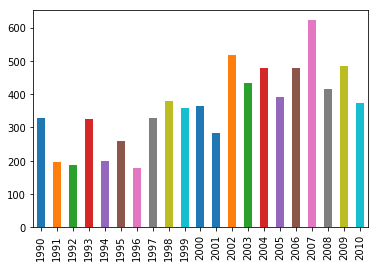

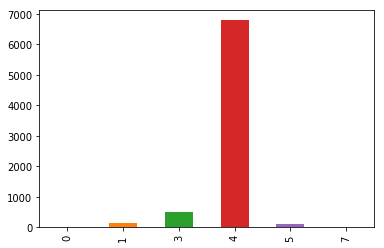

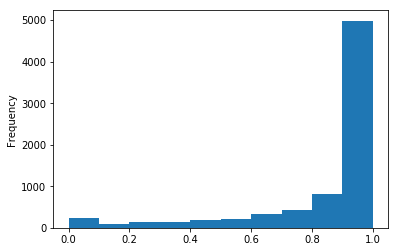

["Wanna Be Startin' Somethin'", 'Zodijackyl Light', "You're a Fucking Bastard", 'Relentless', 'The Chainheart Machine']


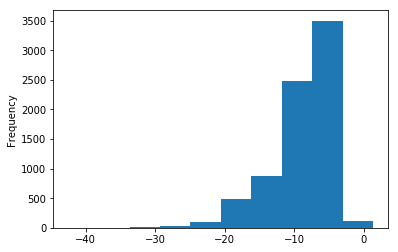

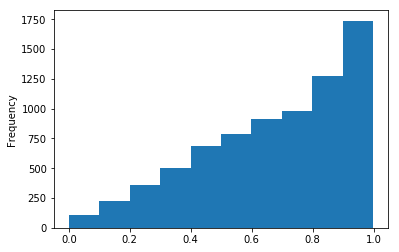

In [4]:
# your EDA code here
#1
print(clean[clean['year'] == 2010].year.count())

#2
print(clean[clean['artistname'] == 'Michael Jackson'].artistname.count())

#3
mj = clean[clean['artistname'] == 'Michael Jackson']
mjtop10 = mj[mj['Top10'] == 1]
print(list(mjtop10['songtitle']))

#4
clean['year'].value_counts().sort_index().plot(kind='bar')
plt.show()

#5
clean['timesignature'].value_counts().sort_index().plot(kind='bar')
plt.show()

#6
clean['timesignature_confidence'].plot(kind='hist')
plt.show()

#7
tempo = clean.sort_values(by=['tempo'], ascending = False)
print(list(tempo.head()['songtitle']))

#8
clean['loudness'].plot(kind='hist')
plt.show()

#9
clean['energy'].plot(kind='hist')
plt.show()


## Creating the training/test sets

We wish to predict whether or not a song will make it to the Top 10. To do this, first split the data into a training set "SongsTrain" consisting of all the observations up to and including 2009 song releases, and a testing set "SongsTest", consisting of the 2010 song releases.

How many observations (songs) are in the training set? How many songs in the test set?

In [5]:
# you train/test set creation code
SongsTrain = clean[clean['year'] < 2010]
SongsTest = clean[clean['year'] == 2010]
print('Training Set:', len(SongsTrain), 'Test Set:', len(SongsTest))

Training Set: 7201 Test Set: 373


## Creating a prediction model

In this problem, our outcome variable is "Top10" - we are trying to predict whether or not a song will make it to the Top 10 of the Billboard Hot 100 Chart. Since the outcome variable is binary, we will build a logistic regression model. We'll start by using all song attributes as our independent variables, which we'll call Model1.

We will only use the variables in our dataset that describe the numerical attributes of the song in our logistic regression model. So we won't use the variables "year", "songtitle", "artistname", "songID" or "artistID".

Now, use sklearn's logistic regression model with L2 penalty to predict Top10 using all of the other variables as the independent variables. You should use SongsTrain (without the five variables above) to build the model. Test the model on SongsTest, also without the five variables named above. In particular, print the confusion matrix on the test set. Interpret this matrix.

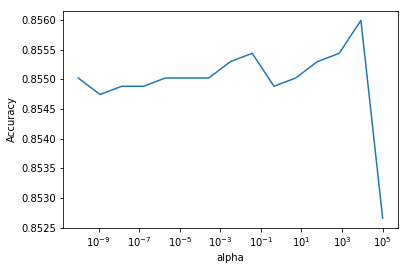

Theta found by sklearn:  [[-2.19142558e-03  1.24318177e-03  3.37024127e-02 -3.10412765e-03
   2.24105232e-03  3.37755199e-03  5.07560657e-04 -1.93804135e-03
  -1.94955596e-04  1.75753122e-02 -9.83442422e-02  6.05722420e-03
  -1.26269907e-03 -4.86055328e-03  6.15833907e-05  1.08915269e-03
  -3.06926803e-03  8.00161740e-03  7.14607276e-03 -6.40535581e-03
   8.20297215e-04 -1.54740979e-02  5.74438187e-03 -6.61714699e-03
  -3.65088291e-03  4.54244550e-03  5.53535195e-03  7.14496840e-04
   4.26543443e-03  4.10724400e-03  5.90148967e-03 -2.41901528e-02
   1.26399452e-02]] [-0.00251157]
Accuracy on the training set =  0.8586307457297597
[[313   1]
 [ 51   8]]


In [6]:
# your model construction code here
SongsTrain_ = SongsTrain.drop(columns=["year", "songtitle", "artistname", "songID", "artistID"])
SongsTest_ = SongsTest.drop(columns=["year", "songtitle", "artistname", "songID", "artistID"])

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X = SongsTrain_.drop(columns=['Top10'])
y = SongsTrain_.Top10
test = SongsTest_.drop(columns=['Top10'])


alpha_list = np.logspace(-10, 5, 15)
score_list = []

for alpha in alpha_list:
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
    logreg.fit(X, y)
    score = cross_val_score(logreg, X, y,
                             scoring='accuracy', cv=10)
    score_list.append(np.mean(score))

score_dict = zip(alpha_list, score_list)
best_alpha = max(score_dict,key=lambda item:item[1])
plt.semilogx(alpha_list,score_list)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()


alpha = best_alpha[0]

logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
logreg.fit(X,y)
print("Theta found by sklearn: ", logreg.coef_, logreg.intercept_)


# compute accuracy on the training set
predy = logreg.predict(X)
# calculate the accuracy of predictions on training set 
accuracy = np.mean(predy==y)
print("Accuracy on the training set = ", accuracy)


coef_x = SongsTest_.Top10
coef_y = logreg.predict(test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(coef_x, coef_y)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)

## Examining the learned model
Look at the coefficients of the learned model, Model1. Plot them as a bar plot with names of the features on x-axis and coefficient value on the y axis

- Which variables are most predictive of Top 10ness of a song?
###### Loundess and Timbre_0_max

- In general, if the confidence is low for the time signature, tempo, and key, then the song is more likely to be complex. What does Model1 suggest about the relation between song complexity and it being a Top 10 song?
###### The less complex the song, the more likely it is to be a Top 10 song.

- Songs with heavier instrumentation tend to be louder (have higher values in the variable "loudness") and more energetic (have higher values in the variable "energy"). By inspecting the coefficient of the variable "loudness", what does Model 1 suggest? Do mainstream listeners prefer songs with heavy instrumentation or light instrumentation? By inspecting the coefficient of the variable "energy", do we draw the same conclusions as above?
###### The coefficient for loundess indicates that listeners prefer heavy instrumentation while the coefficient for energy contradicts this information.

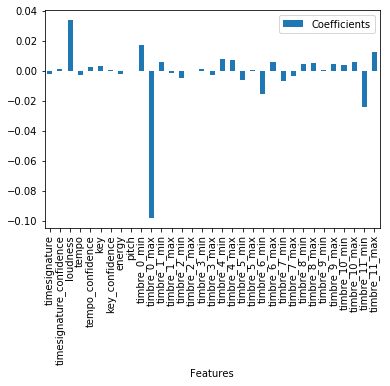

In [7]:
# your code for examining model coefficients
names = list(X)
coefficients = logreg.coef_.tolist()[0]
coef_matrix = pd.DataFrame(
    {'Features': names,
     'Coefficients': coefficients
    })
coef_matrix = coef_matrix.set_index('Features')
coef_matrix.plot(kind='bar')
plt.show()

## A closer look at the model: multi-collinearity

What is the correlation between the variables "loudness" and "energy" in the training set? Given that these two variables are highly correlated, Model 1 suffers from multicollinearity. To avoid this issue, we will omit one of these two variables and rerun the logistic regression. In the rest of this problem, we'll build two variations of our original model: Model 2, in which we keep "energy" and omit "loudness", and Model 3, in which we keep "loudness" and omit "energy".

In [8]:
# your code here for correlation between loudness and energy
clean.loudness.corr(clean.energy)

0.7419918230564928

## Build and evaluate Model2 (Model1 variant without loudness)
- use the same train and test sets as before 
- evaluate confusion matrix on test set

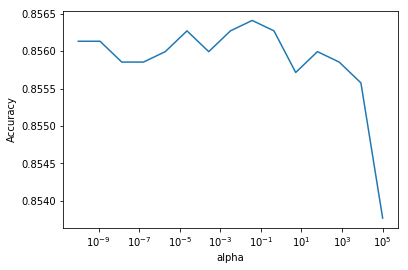

Theta found by sklearn:  [[-8.32057061e-04  4.70776665e-03 -2.90449738e-03  6.67608734e-03
   1.20740957e-02  1.98784852e-03 -1.48422898e-03 -4.60987262e-04
   2.03583053e-02 -1.13364935e-01  6.70071124e-03 -1.07140222e-03
  -4.62956968e-03  1.11427998e-04  9.86032683e-04 -3.04091769e-03
   8.80668514e-03  7.61668217e-03 -7.31286576e-03  7.91749726e-04
  -1.52154618e-02  6.10619351e-03 -6.79986283e-03 -3.61206976e-03
   5.49343424e-03  3.36338410e-03  3.45834738e-04  3.65472039e-03
   2.79544532e-03  7.04298112e-03 -2.88869283e-02  1.35314096e-02]] [-0.00287384]
[[313   1]
 [ 49  10]]


In [9]:
# your model construction and evaluation code
X2 = SongsTrain_.drop(columns=['Top10','loudness'])
y2 = SongsTrain_.Top10
test2 = SongsTest_.drop(columns=['Top10','loudness'])

score_list2 = []

for alpha in alpha_list:
    logreg2 = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
    logreg2.fit(X2, y2)
    score = cross_val_score(logreg2, X2, y2,
                             scoring='accuracy', cv=10)
    score_list2.append(np.mean(score))

score_dict2 = zip(alpha_list, score_list2)
best_alpha2 = max(score_dict2,key=lambda item:item[1])
plt.semilogx(alpha_list,score_list2)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()


alpha2 = best_alpha2[0]
logreg2 = linear_model.LogisticRegression(C=1.0/alpha2,solver='lbfgs',fit_intercept=True)
logreg2.fit(X2,y2)
print("Theta found by sklearn: ", logreg2.coef_, logreg2.intercept_)



coef_x2 = SongsTest_.Top10
coef_y2 = logreg2.predict(test2)
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(coef_x2, coef_y2)
tn2, fp2, fn2, tp2 = confusion_matrix2.ravel()
print(confusion_matrix2)

## Examining the learned Model2

Look at the coefficients of the new learned model (model2). Plot them as a bar plot with names of the features on x-axis and coefficient value on the y axis.

Which variables are most predictive of Top 10 ness of a song?
###### Timbre_0_min, Timbre_0_max, Timbre_11_min

By inspecting the coefficient of the variable "energy", do we draw the same conclusions as in Model 1 for preferences of mainstream listeners?
###### Yes, we do. It indicates listeners do not prefer heavy instrumentation.

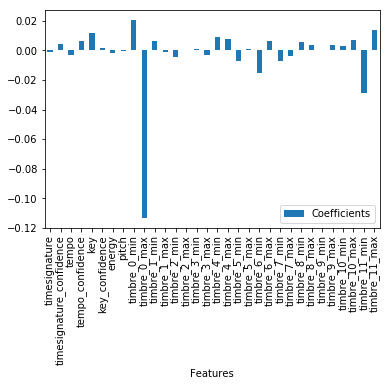

In [10]:
# coeff plot code here
names = list(X2)
coefficients = logreg2.coef_.tolist()[0]
coef_matrix = pd.DataFrame(
    {'Features': names,
     'Coefficients': coefficients
    })
coef_matrix = coef_matrix.set_index('Features')
coef_matrix.plot(kind='bar')
plt.show()

## Build and evaluate Model3 (Model1 variant without energy)
- use the same train and test sets as before 
- evaluate confusion matrix on test set


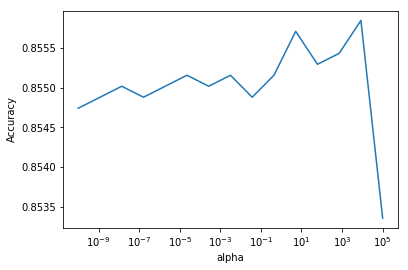

Theta found by sklearn:  [[-2.11756255e-03  1.29198078e-03  3.37472245e-02 -3.07346379e-03
   2.29772483e-03  3.48556382e-03  5.31977274e-04 -1.97226067e-04
   1.75683003e-02 -9.84402278e-02  6.03562630e-03 -1.24208033e-03
  -4.79468671e-03  6.04919635e-05  1.08961395e-03 -3.08237915e-03
   7.99116782e-03  7.16124810e-03 -6.46647684e-03  8.21538709e-04
  -1.54924552e-02  5.79548793e-03 -6.62653898e-03 -3.62994195e-03
   4.52519555e-03  5.51530784e-03  7.57734424e-04  4.23657934e-03
   4.08850926e-03  5.86634020e-03 -2.41717392e-02  1.25481581e-02]] [-0.00255391]
[[313   1]
 [ 51   8]]


In [11]:
# your model construction and evaluation code
X3 = SongsTrain_.drop(columns=['Top10','energy'])
y3 = SongsTrain_.Top10
test3 = SongsTest_.drop(columns=['Top10', 'energy'])


score_list3 = []

for alpha in alpha_list:
    logreg3 = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
    logreg3.fit(X3, y3)
    score = cross_val_score(logreg3, X3, y3,
                             scoring='accuracy', cv=10)
    score_list3.append(np.mean(score))

score_dict3 = zip(alpha_list, score_list3)
best_alpha3 = max(score_dict3,key=lambda item:item[1])
plt.semilogx(alpha_list,score_list3)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()


alpha3 = best_alpha3[0]
logreg3 = linear_model.LogisticRegression(C=1.0/alpha3,solver='lbfgs',fit_intercept=True)
logreg3.fit(X3,y3)
print("Theta found by sklearn: ", logreg3.coef_, logreg3.intercept_)


coef_x3 = SongsTest_.Top10
coef_y3 = logreg3.predict(test3)
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(coef_x3, coef_y3)
tn3, fp3, fn3, tp3 = confusion_matrix3.ravel()
print(confusion_matrix3)


## Examining the learned Model3

Look at the coefficients of the new learned model (Model3). Plot them as a bar plot with names of the features on x-axis and coefficient value on the y axis.

Which variables are most predictive of Top 10 ness of a song?
###### Loundess, Timbre_0_max

By inspecting the coefficient of the variable "loudness", do we draw the same conclusions as in Model 1 for preferences of mainstream listeners?
###### Yes, we do. It indicates listeners do not prefer heavy instrumentation.

Look at the coefficient of loudness in Model 3. Remembering that higher loudness and energy both occur in songs with heavier instrumentation, do we make the same observation about the popularity of heavy instrumentation (or lack thereof) as we did with Model 2?
###### The observation is more similar to model 1, in which the loudness coefficient and energy coefficient provide contradicting information about the popularity of heavy instrumentation.

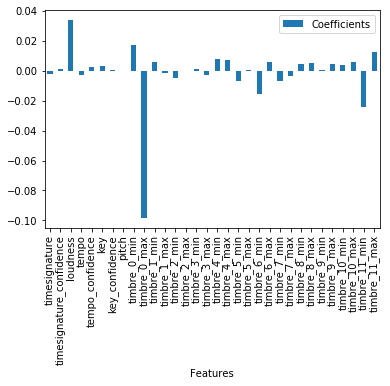

In [12]:
# coef plotting code here
names = list(X3)
coefficients = logreg3.coef_.tolist()[0]
coef_matrix = pd.DataFrame(
    {'Features': names,
     'Coefficients': coefficients
    })
coef_matrix = coef_matrix.set_index('Features')
coef_matrix.plot(kind='bar')
plt.show()

## Comparing the three models (with a new prediction threshold)
- How many songs does Model 1 correctly predict as Top 10 hits in 2010 (remember that all songs in 2010 went into our test set), using a threshold of 0.45? How many non-hit songs does Model 1 predict will be Top 10 hits (again, looking at the test set), using a threshold of 0.45?
- How many songs does Model 2 correctly predict as Top 10 hits in 2010 (remember that all songs in 2010 went into our test set), using a threshold of 0.45? How many non-hit songs does Model 2 predict will be Top 10 hits (again, looking at the test set), using a threshold of 0.45?
- How many songs does Model 3 correctly predict as Top 10 hits in 2010 (remember that all songs in 2010 went into our test set), using a threshold of 0.45? How many non-hit songs does Model 3 predict will be Top 10 hits (again, looking at the test set), using a threshold of 0.45?

In [13]:
tp_m1 = (confusion_matrix(SongsTest_['Top10'],(logreg.predict_proba(test)[:,1] > 0.45)).ravel()[3])
fp_m1 = (confusion_matrix(SongsTest_['Top10'],(logreg.predict_proba(test)[:,1] > 0.45)).ravel()[1])
print('Hit Songs Predicted by Model 1:', tp_m1)
print('False Positives by Model 1:', fp_m1)

tp_m2 = (confusion_matrix(SongsTest_['Top10'],(logreg2.predict_proba(test2)[:,1] > 0.45)).ravel()[3])
fp_m2 = (confusion_matrix(SongsTest_['Top10'],(logreg2.predict_proba(test2)[:,1] > 0.45)).ravel()[1])
print('Hit Songs Predicted by Model 2:', tp_m2)
print('False Positives by Model 2:', fp_m2)

tp_m3 = (confusion_matrix(SongsTest_['Top10'],(logreg3.predict_proba(test3)[:,1] > 0.45)).ravel()[3])
fp_m3 = (confusion_matrix(SongsTest_['Top10'],(logreg3.predict_proba(test3)[:,1] > 0.45)).ravel()[1])
print('Hit Songs Predicted by Model 3:', tp_m3)
print('False Positives by Model 3:', fp_m3)



Hit Songs Predicted by Model 1: 12
False Positives by Model 1: 1
Hit Songs Predicted by Model 2: 14
False Positives by Model 2: 2
Hit Songs Predicted by Model 3: 12
False Positives by Model 3: 1


## Which model would you prefer to use?
- How many top10 songs are in the test set? What fraction do those do Models 1, 2 and 3 capture? 
- Now calculate the specificity and sensitivity of these three models. 
- Comment on the results and explain whether these models could be useful for people investing in the music business.
###### The results show that the true positive rate was not very high. This shows that it is extremely hard to predict the success of musical hits based on the given factors. However, we can use the information and the characteristics that are significant to guide the production process of future music. I would use model 2 because the models have identical sensetivities but model 2 has slightly higher specificity.



In [14]:
# your code and explanation here
from fractions import Fraction

top10songs = len(SongsTest_[(SongsTest_['Top10']==1)])
print('Number of Top10 Songs =', top10songs)
print('Model 1 TP Fraction =', tp/top10songs)
print('Model 2 TP Fraction =', tp2/top10songs)
print('Model 3 TP Fraction =', tp3/top10songs)

spec1 = tp / (tp + fn)
sens1 = tn / (tn + fp)
print('Model 1 Specificity =',spec1,'Model 1 Sensitivity =',sens1)

spec2 = tp2 / (tp2 + fn2)
sens2 = tn2 / (tn2 + fp2)
print('Model 2 Specificity =',spec2,'Model 2 Sensitivity =',sens2)

spec3 = tp3 / (tp3 + fn3)
sens3 = tn3 / (tn3 + fp3)
print('Model 3 Specificity =',spec3,'Model 3 Sensitivity =',sens3)



Number of Top10 Songs = 59
Model 1 TP Fraction = 0.13559322033898305
Model 2 TP Fraction = 0.1694915254237288
Model 3 TP Fraction = 0.13559322033898305
Model 1 Specificity = 0.13559322033898305 Model 1 Sensitivity = 0.9968152866242038
Model 2 Specificity = 0.1694915254237288 Model 2 Sensitivity = 0.9968152866242038
Model 3 Specificity = 0.13559322033898305 Model 3 Sensitivity = 0.9968152866242038


## Extra credit: consider polynomial features and see if you can improve model performance by adding polynomial combinations of the given features
- Use the same train and test sets as before to allow an apples-to-apples comparison.
- Remember to regularize the models (use a validation set to select lambda)
- Compute the confusion matrix and compute specificity and sensitivity
- If the performance improves, to which feature combinations can you attribute it to?
- If the performance does not improve, what could be reasons for that?

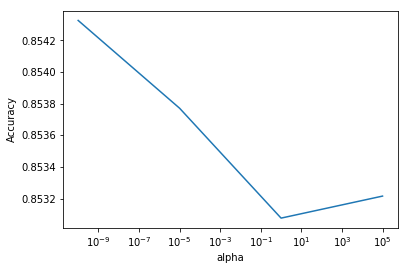

Best alpha:  1e-10
Theta found by sklearn:  [[-0.00024514  0.00389762  0.07388589  0.00130105  0.00567627  0.01122292
   0.00172549 -0.00280486 -0.00038052  0.02351233 -0.13055812  0.00585245
  -0.00091172 -0.00461401 -0.00027975  0.00069943 -0.00337899  0.00810039
   0.00757935 -0.0067618   0.00051927 -0.01828628  0.00640821 -0.00646611
  -0.00265628  0.00277732  0.00689396 -0.00060284  0.0037701   0.0032172
   0.00654895 -0.03236926  0.01825201]] [-0.00218923]
Accuracy on the training set =  0.8590473545340925
[[313   1]
 [ 48  11]]
Model 1 Specificity = 0.1864406779661017 Model 1 Sensitivity = 0.9968152866242038


In [20]:
# your code here
XP = SongsTrain_.drop(columns=['Top10'])
yP = SongsTrain_.Top10
testP = SongsTest_.drop(columns=['Top10'])

alphasP = np.logspace(-10, 5, 4)
scoresP = []

for alpha in alphasP:
    polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
    logregP = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("logreg", logregP)])
    pipeline.fit(XP, yP)
    score = cross_val_score(pipeline, XP, yP, scoring='accuracy', cv=10)
    scoresP.append(np.mean(score))


score_dictP = zip(alphasP, scoresP)
best_alphaP = max(score_dictP,key=lambda item:item[1])
plt.semilogx(alphasP,scoresP)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

alphaP = best_alphaP[0]
print("Best alpha: ", alphaP)
logregP = linear_model.LogisticRegression(C=1.0/alphaP,solver='lbfgs',fit_intercept=True)
logregP.fit(XP, yP)

predyP = logregP.predict(XP) 
accuracyP = np.mean(predyP==yP)
print("Theta found by sklearn: ", logregP.coef_, logregP.intercept_)
print("Accuracy on the training set = ", accuracyP)


coef_xP = SongsTest_.Top10
coef_yP = logregP.predict(testP)
from sklearn.metrics import confusion_matrix
confusion_matrixP = confusion_matrix(coef_xP, coef_yP)
tnP, fpP, fnP, tpP = confusion_matrixP.ravel()
print(confusion_matrixP)
specP = tpP / (tpP + fnP)
sensP = tnP / (tnP + fpP)
print('Model P Specificity =',specP,'Model P Sensitivity =',sensP)